# Sequential fingerspelling data

Dataset: https://www.kaggle.com/competitions/asl-fingerspelling

This notebook contains a brief statistical analysis of the above dataset and provides an example of how to use it for training a model.

# Dependencies

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [51]:
KAGGLE_DS_FOLDER = "kaggle_dataset"

In [52]:
dataset_df = pd.read_csv(os.path.join(KAGGLE_DS_FOLDER, "train.csv"))
print("Full train dataset shape is {}".format(dataset_df.shape))
dataset_df.head()

Full train dataset shape is (67208, 5)


,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road


In [53]:
from collections import Counter

def character_frequency_analysis(strings):
    strings = ["".join(set(s)) for s in strings]
    all_characters = ''.join(strings)
    frequency = Counter(all_characters)
    return frequency.most_common()

strings = list(dataset_df.phrase.values)
frequency = character_frequency_analysis(strings)

print("In how many sequences:")
for char, count in frequency:
    print(f"'{char}': {count}")

In how many sequences:
'a': 38744
'e': 38520
'r': 35334
'o': 34895
'n': 30844
' ': 29488
'i': 29382
's': 29254
't': 28877
'l': 26175
'c': 24673
'-': 23158
'1': 21716
'2': 21691
'd': 20648
'3': 20521
'6': 20474
'4': 20422
'5': 20325
'9': 20195
'm': 20007
'8': 19688
'7': 19623
'h': 19335
'0': 18763
'u': 16860
'w': 14522
'.': 14073
'p': 14021
'/': 13598
'g': 12963
'b': 11710
'k': 10564
'y': 10418
'v': 9465
'+': 8191
'f': 7483
'j': 4143
'z': 3296
'x': 2046
':': 1934
'_': 1347
'q': 1072
'?': 301
'=': 292
'%': 96
'@': 45
',': 28
'&': 24
'~': 21
'(': 16
')': 16
'$': 4
''': 3
'#': 3
'!': 3
'[': 2
'*': 2
';': 1


In [4]:
import pyarrow.parquet as pq

def random_sequence():
    # Fetch sequence_id, file_id, phrase from random row
    sequence_id, file_id, phrase, path = dataset_df.sample(n=1).iloc[0][['sequence_id', 'file_id', 'phrase', 'path']]
    print(f"sequence_id: {sequence_id}, file_id: {file_id}, phrase: {phrase}")
    
    # Fetch data from parquet file
    sample_sequence_df = pq.read_table(os.path.join(KAGGLE_DS_FOLDER, path),
        filters=[[('sequence_id', '=', sequence_id)],]).to_pandas()
    print("Full sequence dataset shape is {}".format(sample_sequence_df.shape))
    
    return sample_sequence_df

In [5]:
# NOTE After running this cell a few times, it is obvious that hands are often missing from frames!
random_sequence()

sequence_id: 1564972230, file_id: 1906357076, phrase: +998-2853-05
Full sequence dataset shape is (113, 1630)


,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1564972230,0,0.701989,0.689132,0.694507,0.677818,0.687693,0.688077,0.690983,0.606862,0.690895,...,-0.128184,-0.147213,-0.079287,-0.116724,-0.143215,-0.160250,-0.098293,-0.129179,-0.142056,-0.149805
1564972230,1,0.700481,0.688314,0.693910,0.677082,0.686814,0.687223,0.690330,0.606679,0.690235,...,-0.086234,-0.102313,-0.046532,-0.077655,-0.105804,-0.123015,-0.061249,-0.091646,-0.107589,-0.115889
1564972230,2,0.699350,0.688540,0.693992,0.677278,0.687044,0.687425,0.690442,0.606712,0.690281,...,-0.072212,-0.086789,-0.040875,-0.067635,-0.092528,-0.108645,-0.058183,-0.084267,-0.098722,-0.106987
1564972230,3,0.700333,0.687298,0.693128,0.676150,0.685755,0.686197,0.689430,0.606562,0.689267,...,-0.069323,-0.084768,-0.039472,-0.064952,-0.089697,-0.106581,-0.058102,-0.082752,-0.096656,-0.105464
1564972230,4,0.703108,0.687992,0.693694,0.676351,0.686417,0.686688,0.689353,0.606369,0.688932,...,-0.068868,-0.084264,-0.040144,-0.065814,-0.089994,-0.106449,-0.059669,-0.083769,-0.096741,-0.104997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564972230,108,0.723485,0.712052,0.715500,0.699989,0.711117,0.711426,0.713551,0.623144,0.713518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1564972230,109,0.723429,0.712051,0.715549,0.700037,0.711115,0.711428,0.713623,0.623130,0.713686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1564972230,110,0.725423,0.711421,0.714918,0.699523,0.710503,0.710860,0.713194,0.623768,0.713310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc

import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

# matplotlib.rcParams['animation.embed_limit'] = 2**128
# matplotlib.rcParams['savefig.pad_inches'] = 0
rc('animation', html='jshtml')

def create_animation(images):
    fig = plt.figure(figsize=(6, 9))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    im=ax.imshow(images[0], cmap="gray")
    plt.close(fig)
    
    def animate_func(i):
        im.set_array(images[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(images), interval=1000/10)

mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

def collect_landmarks_oftype(_type: str, frame_data: pd.Series):
    x_type = frame_data.filter(regex=f"x_{_type}.*").values
    y_type = frame_data.filter(regex=f"y_{_type}.*").values
    z_type = frame_data.filter(regex=f"z_{_type}.*").values
    landmarks = landmark_pb2.NormalizedLandmarkList()
    for x, y, z in zip(x_type, y_type, z_type):
        landmarks.landmark.add(x=x, y=y, z=z)
    return landmarks
        
def produce_video_from_seq(seq_df: pd.DataFrame):
    frames = []
    for seq_idx in range(len(seq_df)):
        frame = np.zeros((600, 600, 3))
        frame_data = seq_df.iloc[seq_idx]
        
        # Right hand
        right_hand_landmarks = collect_landmarks_oftype("right_hand", frame_data)
        mp_drawing.draw_landmarks(
                frame,
                right_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())
        
        # Left Hand
        left_hand_landmarks = collect_landmarks_oftype("left_hand", frame_data)
        mp_drawing.draw_landmarks(
                frame,
                left_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())
        
        # Face
        face_landmarks = collect_landmarks_oftype("face", frame_data)
        mp_drawing.draw_landmarks(
            frame,
            face_landmarks,
            mp_holistic.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        
        # Pose
        pose_landmarks = collect_landmarks_oftype("pose", frame_data)
        mp_drawing.draw_landmarks(
            frame,
            pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.
            get_default_pose_landmarks_style())
        
        frames.append(frame.astype(np.uint8))
    return frames

In [8]:
video = produce_video_from_seq(random_sequence())
create_animation(video)

sequence_id: 1242215015, file_id: 1726141437, phrase: 7762 laundree rd
Full sequence dataset shape is (182, 1630)


In [13]:
#!pip install imageio
import imageio

output_path = 'sup.gif'
writer = imageio.get_writer(output_path, duration=0.) #time between frames
for image in video:
    image = np.uint8(image)
    writer.append_data(image)

writer.close()
print(f'GIF saved at: {output_path}')

In [12]:
n = 6
fig, axs = plt.subplots(2, n//2)#, figsize=(15,10))  # Adjust size and number of subplots as necessary
axs = axs.ravel()
for i, j in zip(range(0, n*5, 2), range(n)):
    axs[j].imshow(video[i])
    axs[j].set_title(f"Képkocka {j}", fontsize=12, fontname="Calibri")
    axs[j].axis('off')
plt.tight_layout()
plt.savefig('animation.png', dpi=300, transparent=True)  # High resolution
plt.show()

# Statistics

In [6]:
def lengths_hist(lengths, title=None, save=False, figsize=None):
    if figsize:
        plt.figure(figsize=figsize)
    bins = int(max(lengths) + 3)
    if bins < 100:
        plt.hist(lengths, bins=bins, edgecolor='black')
    else:
        plt.hist(lengths, bins=bins)
    y_min, y_max = plt.ylim()
    max_length = max(lengths)
    plt.plot([max_length, max_length], [y_min, y_max])
    plt.title(f'{title} (Max: {max_length})')
    plt.xlabel("Length")
    plt.ylabel("Count")
    
    if save:
        plt.savefig(f'{title}.png', dpi=300)
    
    plt.show()

def calc_percentiles(values: list, percentiles=[25, 50, 75, 80, 90]):
    percentile_values = np.percentile(values, percentiles)
    for p, value in zip(percentiles, percentile_values):
        print(f"{p}th percentile: {value}")

## Length of phrases

Average phrase length: 17.80463635281514

Percentiles:
25th percentile: 12.0
50th percentile: 17.0
75th percentile: 22.0
80th percentile: 23.0
90th percentile: 27.0


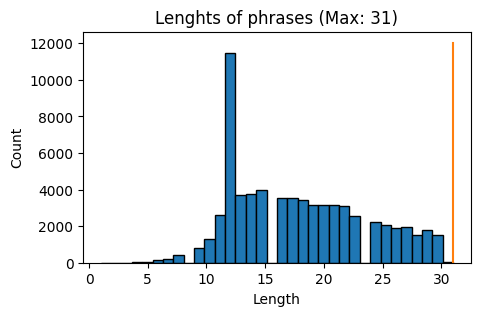

In [7]:
phrase_lengths = [len(phrase) for phrase in dataset_df.phrase.values]
print(f"Average phrase length: {sum(phrase_lengths)/len(phrase_lengths)}")
print("\nPercentiles:")
calc_percentiles(phrase_lengths)
lengths_hist(phrase_lengths, title="Lenghts of phrases", figsize=(5,3))

## Length of sequences

Average sequence length: 159.6797107487204

Percentiles:
25th percentile: 104.0
50th percentile: 148.0
75th percentile: 207.0
80th percentile: 223.0
90th percentile: 270.0


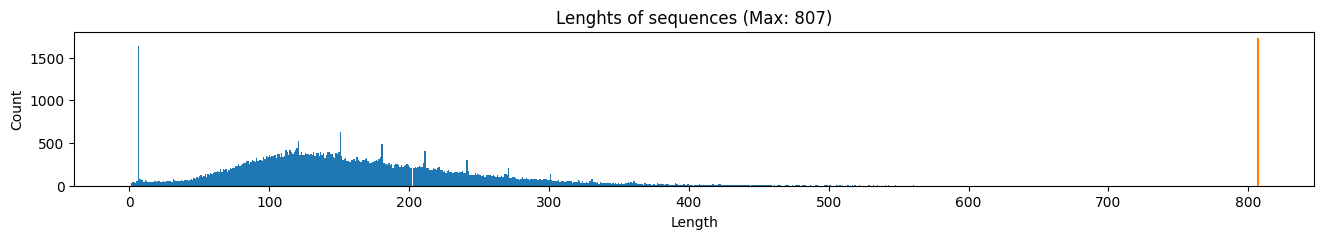

In [8]:
seq_lengths = []
for file_path in dataset_df.path.unique():
    pq_file = os.path.join(KAGGLE_DS_FOLDER, file_path)
    test = pq.read_table(pq_file,columns=['sequence_id'])
    unique_elements, counts = np.unique(test.to_pandas().index.values, return_counts=True)
    seq_lengths.extend(counts)

print(f"Average sequence length: {sum(seq_lengths)/len(seq_lengths)}")
print("\nPercentiles:")
calc_percentiles(seq_lengths)
lengths_hist(seq_lengths, title="Lenghts of sequences", figsize=(16,2))

Notes:

- What's interesting to note is that there are many cases where the sequences are only a few frames long. This is normal if the phrase associated with the sequence has a short length.
- From the animation preview, it is clear that in many frames the detailed hand landmarks are not available.

# Preprocess Dataset

- Filter any special characters as this experiment focuses on traditional characters: `a-z` and `numbers`
    - Also possible to collect a relaxed version, where based on the character frequencies only these are filtered: `:_?=%@,&~()$'#![*;`, they only appear in 5210 sequences
    - Later the non alpha numerical characters can be masked out
- Identify dominant hand (enough for ASL Fingerspelling), `only work with the 21*3 coordinates of dominant hand`
- Remove frames where the dominant hand is not fully visible
- Keep sequences that have at least 3 frames/character in the target phrase

In [134]:
KAGGLE_DS_FOLDER = "kaggle_dataset"

In [135]:
dataset_df = pd.read_csv(os.path.join(KAGGLE_DS_FOLDER, "train.csv"))
dataset_df.head()

,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road


In [137]:
import re

def get_phrase_type(phrase):
    # Phone Number
    if re.match(r'^[\d+-]+$', phrase):
        return 'phone_number'
    # url
    elif any([substr in phrase for substr in ['www', '.', '/']]) and ' ' not in phrase:
        return 'url'
    # Address
    else:
        return 'address'

def contains_special_characters(s: str):
    special_chars = ":_?=%@,&~()$'#![*;"
    return any(char in special_chars for char in s)

def is_alphanumeric_plus_space(s: str) -> bool:
    # Regular expression to match alphanumeric characters (A-Z, a-z, 0-9) and spaces
    return bool(re.match("^[A-Za-z0-9]+$", s.replace(" ", "")))

In [138]:
# Create index for metadata

from itertools import groupby

def my_groupby(items, key):
    sorted_items = sorted(items, key=key)
    return groupby(sorted_items, key=key)

data = dataset_df[["file_id", "sequence_id", "participant_id", "phrase"]].values
index = {
    file_id: {
        sample[1]: {"signer_id": sample[2], "phrase": sample[3]} for sample in list(group)
    } for file_id, group in my_groupby(data, key=lambda sample: sample[0]) # by file_id
}

# index: file_id -> sequence_id -> {'signer_id': <id>, 'phrase': <'example phrase'>}

In [149]:
data_folder = dataset_df.path.values[0].split("/")[0]
parquet_files_folder = os.path.join(KAGGLE_DS_FOLDER, data_folder)

# Only want the hands
rigth_hand_col_names = labels = [f'{axis}_right_hand_{i}' for axis in ['x', 'y', 'z'] for i in range(21)]
left_hand_col_names = labels = [f'{axis}_left_hand_{i}' for axis in ['x', 'y', 'z'] for i in range(21)]
hand_col_names = rigth_hand_col_names + left_hand_col_names

saved_sequences = []
saved_metadata = []

for file_id in index.keys():
    parquet_file_path = os.path.join(parquet_files_folder, f"{file_id}.parquet")
    print(f"Processing {parquet_file_path}")
    data_df = pd.read_parquet(parquet_file_path, columns=hand_col_names)

    for sequence_id, sequence_df in data_df.groupby("sequence_id"):
        # Filter out phrases that don't meet certain criteria
        phrase = index[file_id][sequence_id]["phrase"]

        if not is_alphanumeric_plus_space(phrase):
            continue

        sequence_df = sequence_df.reset_index(drop=True)

        # Find dominant hand
        # x,y,z coordinates are either all inside or all missing, so checking for missing hands the x coordinates are enough
        right_hand_df = sequence_df[rigth_hand_col_names]
        left_hand_df = sequence_df[left_hand_col_names]

        right_perfect_frames_mask = right_hand_df.isna().sum(axis=1) == 0
        left_perfect_frames_mask = left_hand_df.isna().sum(axis=1) == 0

        # NOTE also does filtering
        dominant_hand_df = right_hand_df[right_perfect_frames_mask] \
            if sum(right_perfect_frames_mask) >= sum(left_perfect_frames_mask) \
            else left_hand_df[left_perfect_frames_mask]

        # Check if "enough frames" to translate phrase
        if (len(dominant_hand_df) < 3*len(phrase)) or (len(dominant_hand_df) > 256):
            continue

        # Cumulate sequence
        saved_sequences.append(dominant_hand_df.values)
        saved_metadata.append([sequence_id, phrase, index[file_id][sequence_id]["signer_id"]])


Processing kaggle_dataset\train_landmarks\5414471.parquet
Processing kaggle_dataset\train_landmarks\105143404.parquet
Processing kaggle_dataset\train_landmarks\128822441.parquet
Processing kaggle_dataset\train_landmarks\149822653.parquet
Processing kaggle_dataset\train_landmarks\152029243.parquet
Processing kaggle_dataset\train_landmarks\169560558.parquet
Processing kaggle_dataset\train_landmarks\175396851.parquet
Processing kaggle_dataset\train_landmarks\234418913.parquet
Processing kaggle_dataset\train_landmarks\296317215.parquet
Processing kaggle_dataset\train_landmarks\349393104.parquet
Processing kaggle_dataset\train_landmarks\388576474.parquet
Processing kaggle_dataset\train_landmarks\425182931.parquet
Processing kaggle_dataset\train_landmarks\433948159.parquet
Processing kaggle_dataset\train_landmarks\450474571.parquet
Processing kaggle_dataset\train_landmarks\474255203.parquet
Processing kaggle_dataset\train_landmarks\495378749.parquet
Processing kaggle_dataset\train_landmarks\

In [ ]:
SAVE_FOLDER = "processed_dataset"

if os.path.exists(SAVE_FOLDER):
    raise RuntimeError(f"Error: The folder '{SAVE_FOLDER}' already exists. Becareful with overwriting your existing dataset!")
else:
    os.makedirs(SAVE_FOLDER)
    print(f"You will find your files in '{SAVE_FOLDER}' folder once the filtering is finished.")

sequnce_id_index = []
for seq, meta in zip(saved_sequences, saved_metadata):
    sequnce_id_index.extend([meta[1]]*len(seq))

df = pd.DataFrame(data=np.concatenate(saved_sequences), columns=[f'{axis}_dominant_hand_{i}' for axis in ['x', 'y', 'z'] for i in range(21)])
df["sequence_id"] = sequnce_id_index
df.set_index("sequence_id", inplace=True)
df.to_pickle(os.path.join(SAVE_FOLDER, "data.pkl"))

metadata_df = pd.DataFrame(saved_metadata, columns=["sequence_id", "phrase", "signer_id"])
metadata_df.to_csv("metadata.csv", index=False)

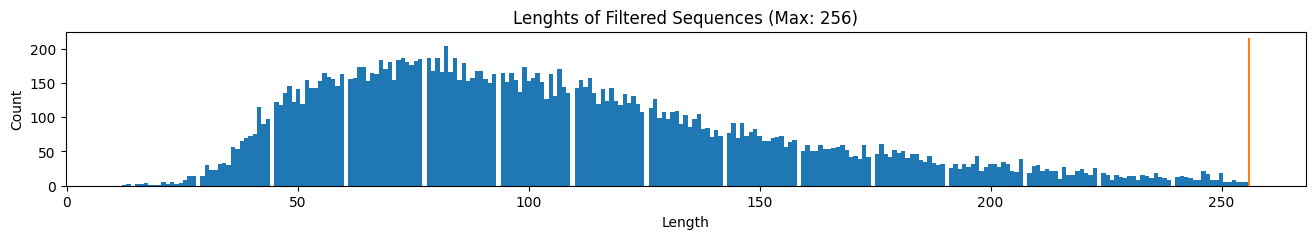

In [166]:
seq_lengths = [len(s) for s in saved_sequences]
lengths_hist(seq_lengths, title="Lenghts of Filtered Sequences", figsize=(16,2))

Average: 6.521950219928097


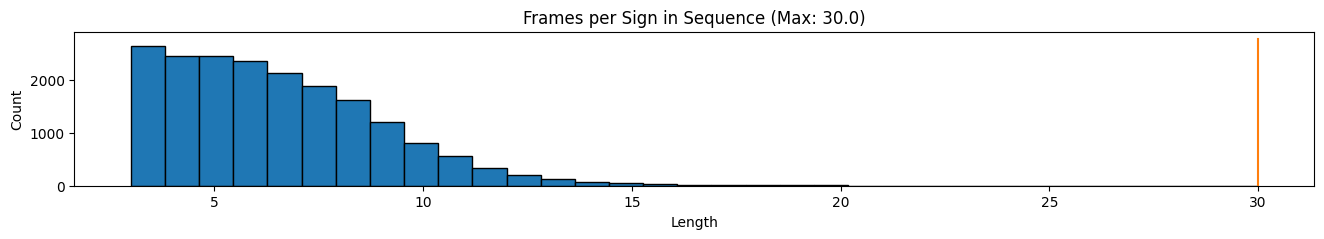

In [168]:
seq_lengths = [len(s)/len(meta[1]) for s, meta in zip(saved_sequences, saved_metadata)]
print(f"Average: {sum(seq_lengths)/len(seq_lengths)}")
lengths_hist(seq_lengths, title="Frames per Sign in Sequence", figsize=(16,2))